## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

---

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which producct category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?



In [2]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm


In [3]:
df = pd.read_csv("/Users/oeendrila/Documents/GitHub/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [4]:
df.shape

(2443651, 9)

In [5]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [6]:
df.set_index('uid')

,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
uid,,,,,,,,
1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...
2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing


 # Part 1: Analyzing Best-Seller Trends Across Product Categories

In [8]:
# General Selection
cat = df.select_dtypes(exclude="number") #filter df
num = df.select_dtypes(include="number") #filter df

# refining cat df
cat_from_df = num.loc[:, num.nunique() < 20] # how does loc work Vs iloc
cat = pd.concat([cat, cat_from_df], axis=1)

#refining num df
num = num.drop(columns=cat_from_df.columns)

In [9]:
cat.head(3)

,asin,title,isBestSeller,category
0,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers
1,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",True,Hi-Fi Speakers
2,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",False,Hi-Fi Speakers


In [10]:
#adding margins and extra row and column and adding column total 
crosstab = pd.crosstab(cat['category'], cat['isBestSeller'], margins=True, margins_name="Total")
crosstab.columns = ['not_bestseller', 'bestseller', 'total']


In [11]:
crosstab['proportion_bestsellers'] = crosstab['bestseller']/crosstab['total']
sorted_crosstab= crosstab.sort_values(by = 'proportion_bestsellers', ascending = False).round(3)
sorted_crosstab.head(5)

,not_bestseller,bestseller,total,proportion_bestsellers
category,,,,
Grocery,9008,556,9564,0.058
Smart Home Security & Lighting,98,6,104,0.058
Health & Personal Care,9017,552,9569,0.058
Mobile Phone Accessories,248,11,259,0.042
Power & Hand Tools,8353,306,8659,0.035


The category of "Grocery" followed by smart home appliances and healthcare products sell the best in terms of proportion. However, the not_bestseller column indicates that this is a low proportion within the category itself

In [13]:
chi2_stats, chi2_pvalue, _,_  = chi2_contingency(crosstab.head())
chi2_pvalue


2.6633246114051854e-09

In [14]:
crosstab_two=crosstab.copy() 
crosstab_two = crosstab_two.drop(columns='proportion_bestsellers') #needs an integer array to calculate 

In [15]:
association(crosstab_two, method='cramer')

0.04323354945446208

The p-value is lower than 0.05 and indicates an association between the variables. Therefore, we reject the null hypothesis. The low Cramer's V ranges of 0.04 indicates that there is a weak association between the two categorical variables. 

# Visualisation the relationship between isbestseller and category using stacked bar chart

In [18]:
sorted_crosstab = sorted_crosstab.drop(columns='proportion_bestsellers')
sorted_crosstab

,not_bestseller,bestseller,total
category,,,
Grocery,9008,556,9564
Smart Home Security & Lighting,98,6,104
Health & Personal Care,9017,552,9569
Mobile Phone Accessories,248,11,259
Power & Hand Tools,8353,306,8659
...,...,...,...
Snowboard Boots,1449,0,1449
Internal TV Tuner & Video Capture Cards,253,0,253
Boxes & Organisers,911,0,911


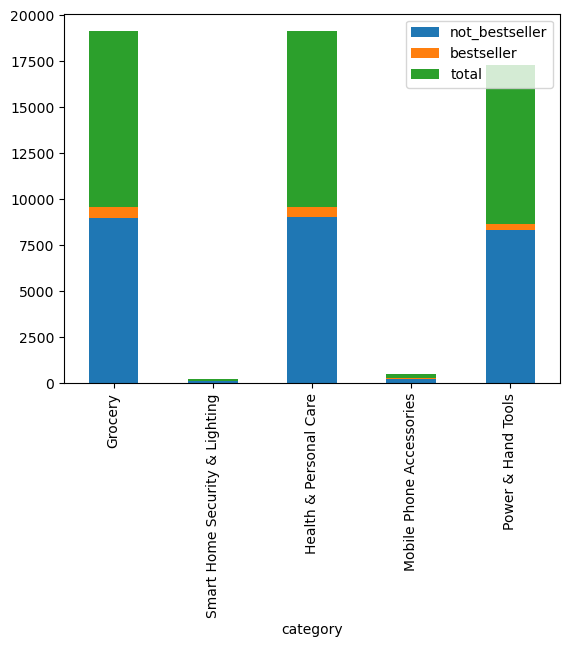

In [19]:
sorted_crosstab.head().plot(kind='bar', stacked=True)
plt.show()

# Outliers

In [21]:
df.price.describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [22]:
def outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [23]:
outliers = outliers (df['price'])
new_df = df.drop(outliers.index)
new_df.head(3)


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers


# Part 2: visualisation using violin plot - price across categories

In [25]:
#filter out the 20 top counts categories - "filter out" = took this to mean including otherwise it gets messy
top_20 = new_df['category'].value_counts().head(20).index
filtered_cat=new_df[new_df['category'].isin(top_20)]


/var/folders/35/95bptg013g75yzs_np0t8xw00000gn/T/ipykernel_69458/2126866607.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='category', y='price', data = filtered_cat, palette='muted')


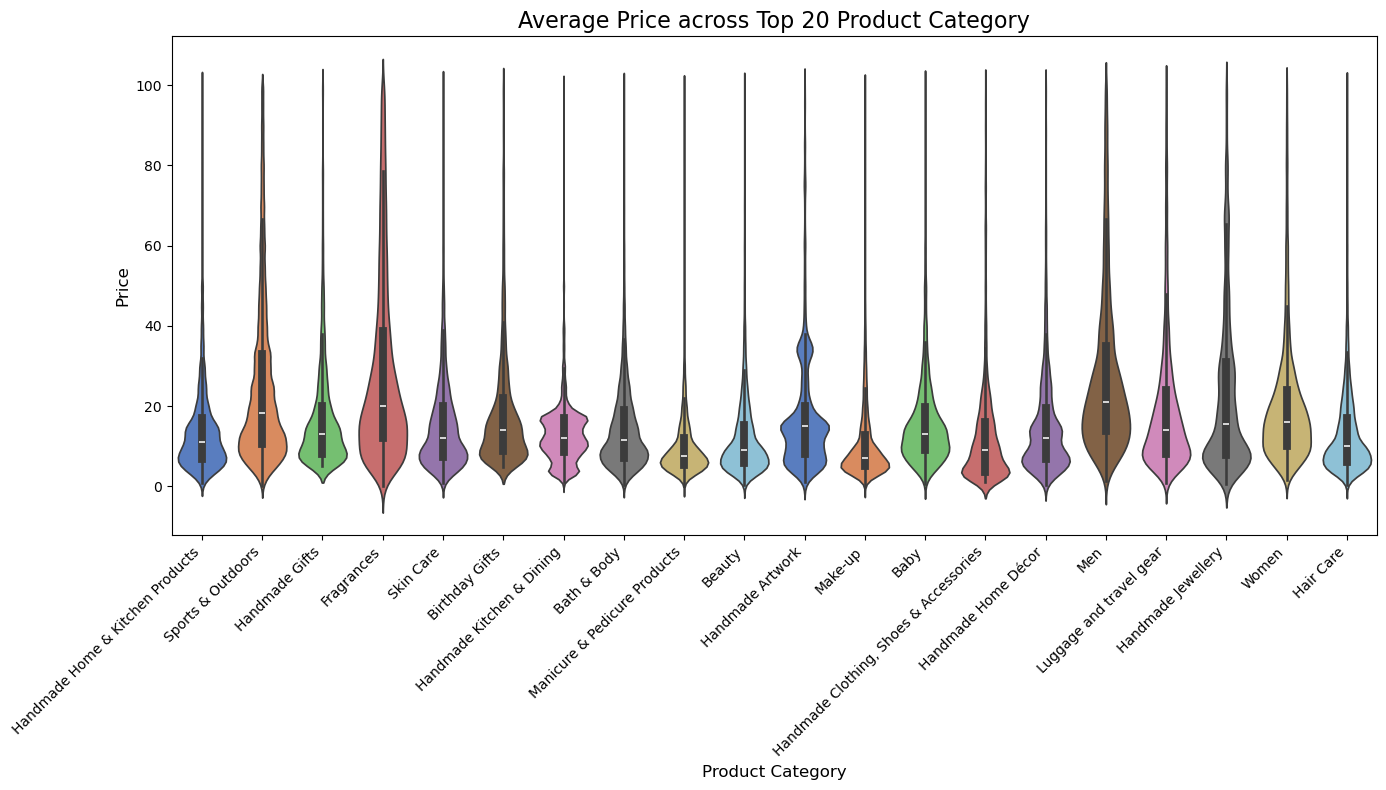

In [26]:
plt.figure(figsize=(14, 8)) #first increase the size

sns.violinplot(x='category', y='price', data = filtered_cat, palette='muted')

plt.title('Average Price across Top 20 Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the plot
plt.tight_layout()  # Adjust the layout to make sure everything fits
plt.show()

In [27]:
#median price

med_price = new_df.groupby('category')['price'].median().sort_values(ascending=False)
med_price

category
Desktop PCs              74.00
Boxing Shoes             69.79
Tablets                  69.00
Graphics Cards           68.54
Motherboards             67.92
                         ...  
Adapters                  7.05
Make-up                   7.00
Signs & Plaques           6.99
Arts & Crafts             5.99
Office Paper Products     4.37
Name: price, Length: 296, dtype: float64

Interpretation - the plots have varie iqr signified by the box but the median price of all these categories fall between 10 and 20 dollars with only men's products going slightly over average.Very few products go up to 100 dollars with fragrances appearing to be slightly more expensive than other categories. 

In [29]:
top_10 = new_df['category'].value_counts().head(10).index
top_10_cat=new_df[new_df['category'].isin(top_10)]

/var/folders/35/95bptg013g75yzs_np0t8xw00000gn/T/ipykernel_69458/1191551361.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_category.index, y=avg_price_per_category.values, palette='viridis')


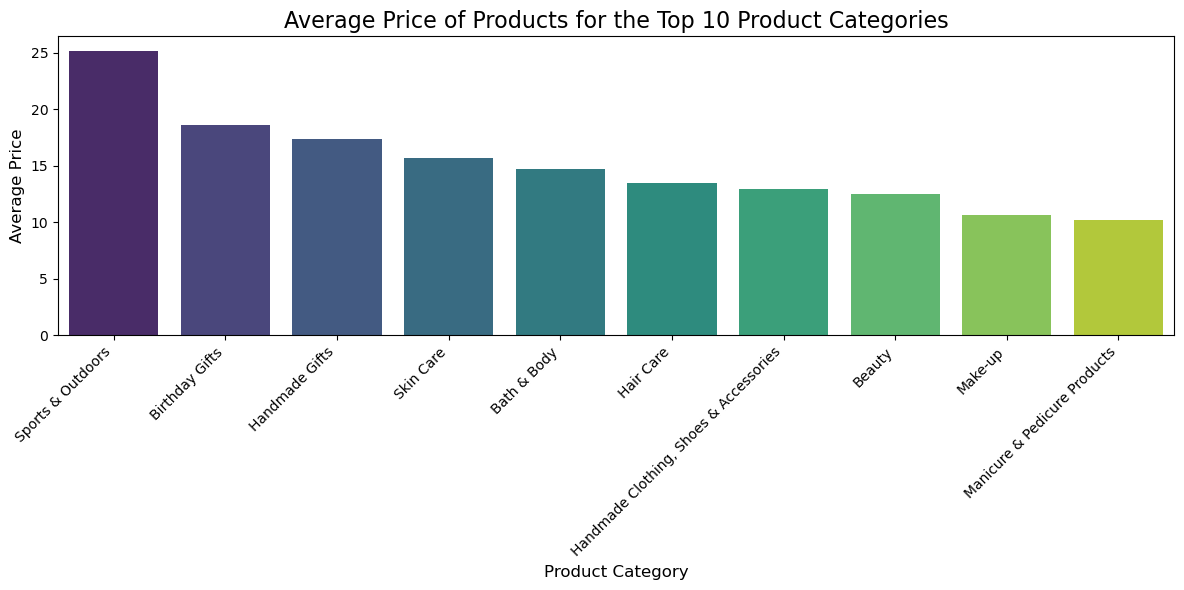

In [30]:
#bar chart 

avg_price_per_category = top_10_cat.groupby('category')['price'].mean().sort_values(ascending=False)

# Step 4: Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_category.index, y=avg_price_per_category.values, palette='viridis')

# Step 5: Add titles and labels
plt.title('Average Price of Products for the Top 10 Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability

# Step 6: Show the plot
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()

In [31]:
average_price = new_df.groupby('category')['price'].mean().sort_values(ascending=False)
average_price

category
Motherboards             68.772432
Boxing Shoes             67.417803
Desktop PCs              66.915562
Tablets                  66.552971
Graphics Cards           65.103509
                           ...    
Bedding Accessories       8.835220
Adapters                  8.750197
Signs & Plaques           8.210513
Arts & Crafts             8.006540
Office Paper Products     6.876369
Name: price, Length: 296, dtype: float64

In [32]:
top_10 = new_df['category'].value_counts().head(10).index
top_10_ratings=new_df[new_df['category'].isin(top_10)]

/var/folders/35/95bptg013g75yzs_np0t8xw00000gn/T/ipykernel_69458/3289736189.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_10_ratings, x="category", y="stars", palette="coolwarm")


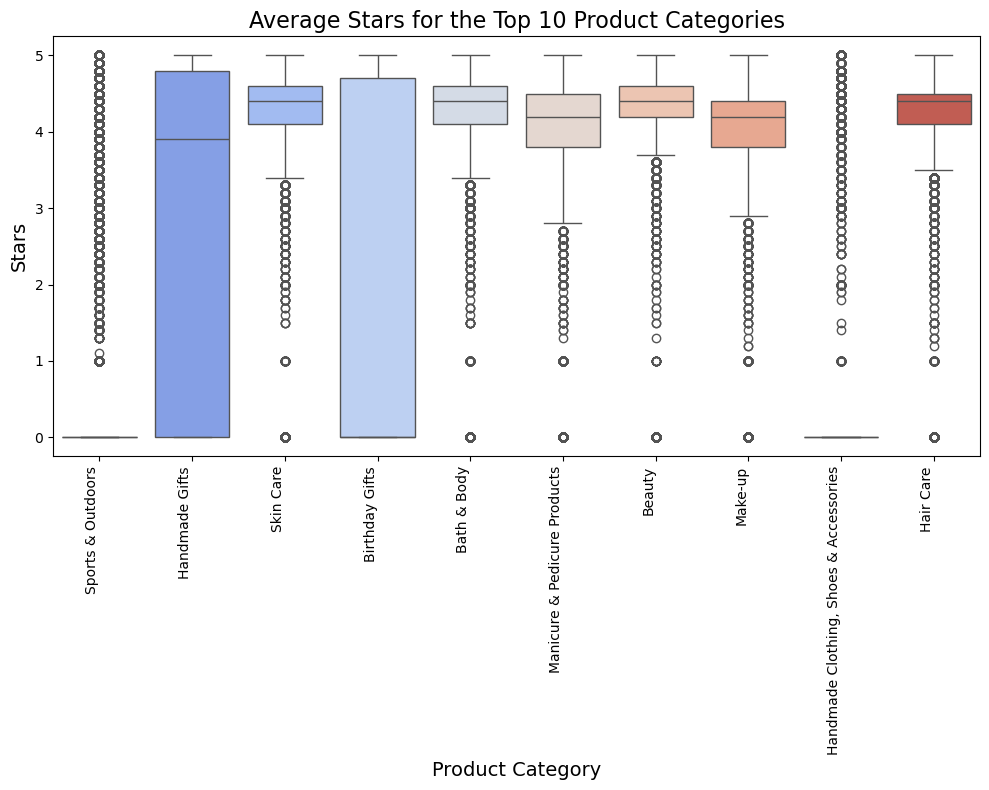

In [33]:
plt.figure(figsize = (10,8))

sns.boxplot(data=top_10_ratings, x="category", y="stars", palette="coolwarm")
plt.title('Average Stars for the Top 10 Product Categories', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Stars', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to make sure everything fits
plt.show()

Interpretation:  most products have an average median rating between 3.5 and 4.5. Outside of the filtered top ten, the category that receives the highest median rating is 'Computer Memory'.

In [35]:
highest_median = new_df.groupby('category')['stars'].median().sort_values(ascending=False)
highest_median

category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
                               ... 
Hockey Shoes                    0.0
Hi-Fi Receivers & Separates     0.0
Handmade Kitchen & Dining       0.0
Handmade Jewellery              0.0
eBook Readers & Accessories     0.0
Name: stars, Length: 296, dtype: float64

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

In [38]:
new_df['price'].corr(df['stars']) #pearson

-0.07767299878181352

In [39]:
new_df['price'].corr(df['stars'], method='spearman') 

-0.06679697280768393

# pearson correlation: (-0.07767)
# spearman correlation: (- 0.06679)

Insights: Insights:

The Pearson correlation of (-0.07767) suggests a weak negative linear relationship between price and star. This would mean that when the price decreases the ratings increase but it is not a strong correlation.

The Spearman correlation of (- 0.06679) indicates a weak negative monotonic relationship between the two variables. The value is close to zero suggesting an almost independent relationship



In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=new_df, color='blue', alpha=0.6)

plt.title('Relationship Between Product Rating and Price', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.tight_layout()
plt.show()

Interpretation:  Overall ratings are spread over low to high ranking quite uniformly with cheap and expensive products receiving 3 to 5 stars.
However, there are a few products that have reached negative and poor ratings across price range.

In [44]:
num.shape

(2443651, 5)

In [46]:
spearman_correlations_sorted = num.corrwith(new_df['price'], method='pearson').sort_values(ascending=False) # positive ones
spearman_correlations_sorted

price                1.000000
uid                  0.001717
reviews             -0.008498
boughtInLastMonth   -0.059051
stars               -0.077673
dtype: float64

In [48]:
num.corrwith(new_df['price'], method='spearman').sort_values(ascending=True)[:5] # negative ones

boughtInLastMonth   -0.167260
reviews             -0.078127
stars               -0.066797
uid                 -0.003152
price                1.000000
dtype: float64

In [52]:
correlation_matrix = num.corr()

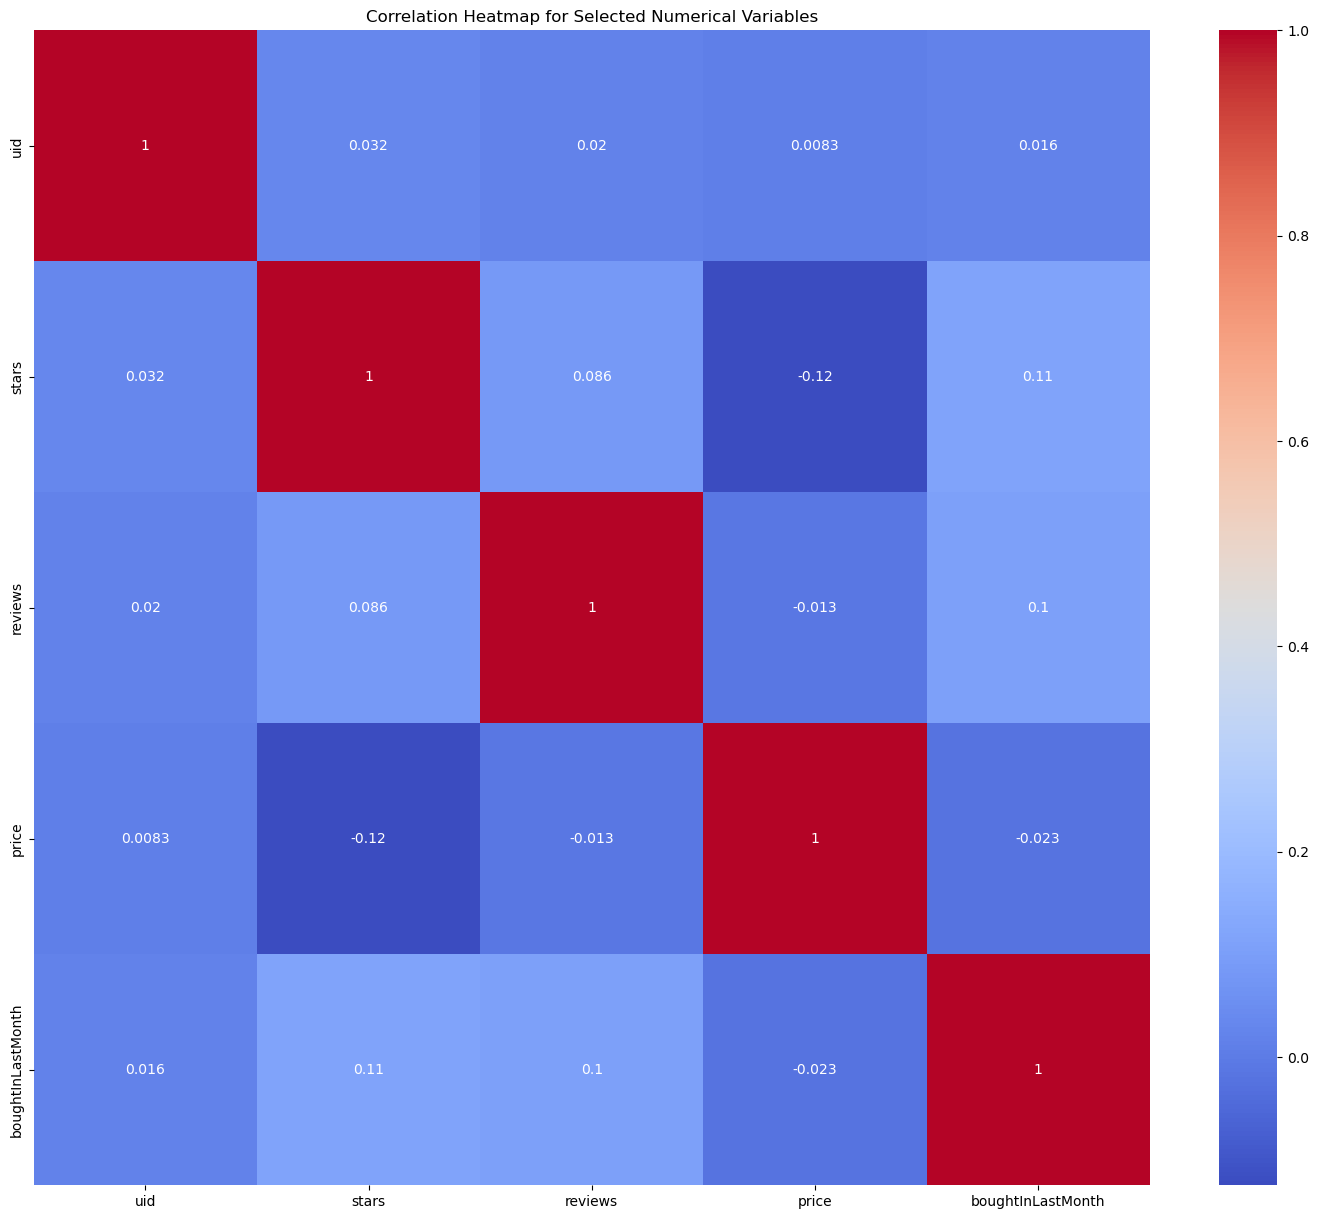

In [54]:
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

# qq plot 



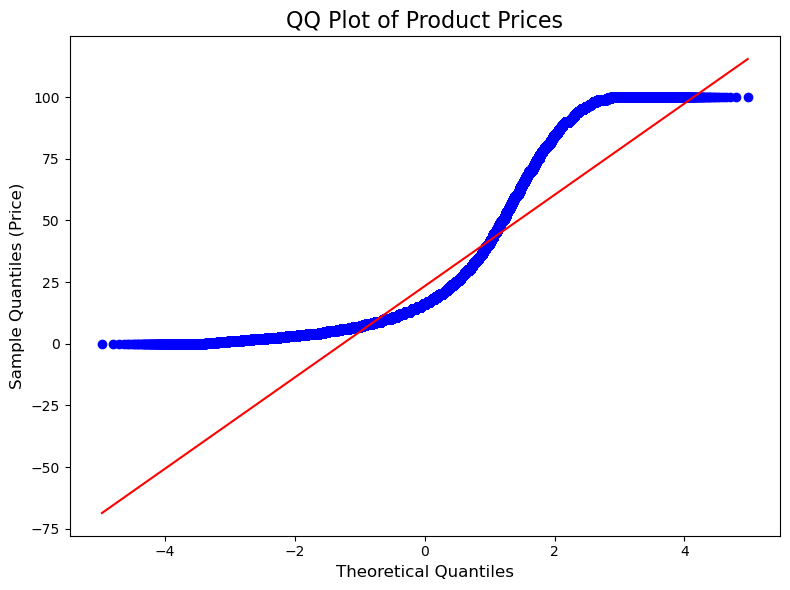

In [61]:
price_data = new_df['price'].dropna() #extracting column, and checking for nulls

# Step 2: Create the QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(price_data, dist="norm", plot=plt)   #price data compares to the normal distribution

# Step 3: Add title and labels
plt.title('QQ Plot of Product Prices', fontsize=16)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles (Price)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Interpretation: This does not follow a normal distribution. 

<Axes: xlabel='price', ylabel='Count'>

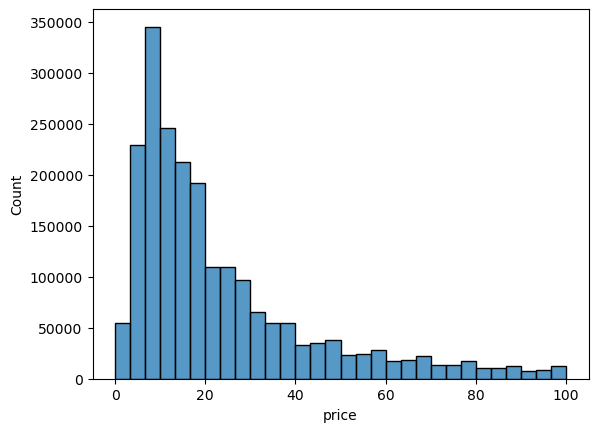

In [60]:
sns.histplot(new_df['price'], bins=30)

# BONUS

In [ ]:
#not a normal distribution - positive skew 

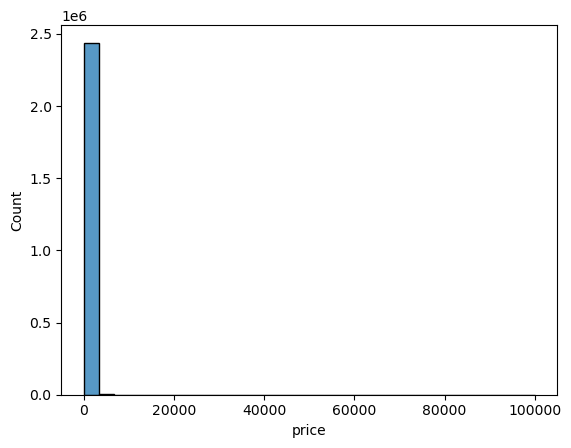

In [64]:
sns.histplot(df['price'], bins=30)
plt.show()